**Question 9 -**
<br>Write a program to read the data from the following link, perform data analysis and answer the following questions
<br>**Note -**
1. Write code comments wherever required for code understanding
**Link -** https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
<br>**Insights to be drawn -**
<br>● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
<br>● Get all TESLA cars with the model year, and model type made in Bothell City.
<br>● Get all the cars that have an electric range of more than 100, and were made after 2015
<br>● Draw plots to show the distribution between city and electric vehicle type

**Ans**

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data from the provided link
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
df = pd.read_csv(url)

In [3]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         130443 non-null  object 
 1   County                                             130440 non-null  object 
 2   City                                               130440 non-null  object 
 3   State                                              130443 non-null  object 
 4   Postal Code                                        130440 non-null  float64
 5   Model Year                                         130443 non-null  int64  
 6   Make                                               130443 non-null  object 
 7   Model                                              130221 non-null  object 
 8   Electric Vehicle Type                              130443 non-null  object

In [6]:
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Not eligible due to low battery range',
       'Eligibility unknown as battery range has not been researched'],
      dtype=object)

In [8]:
# Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df[
    df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].isin([
        'Not eligible due to low battery range',
        'Eligibility unknown as battery range has not been researched'
    ])
]
non_clean_fuel_cars_info = non_clean_fuel_cars[['Make', 'Model']]
print("Cars and their types that do not qualify for clean alternative fuel vehicle:")
print(non_clean_fuel_cars_info)

Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]


In [10]:
df['City'].unique()

array(['Yakima', 'Poulsbo', 'Seattle', 'Lacey', 'Olympia', 'Tumwater',
       'Rochester', 'Bremerton', 'Bainbridge Island', 'Everett',
       'Leavenworth', 'Mill Creek', 'Snohomish', 'Mount Vernon',
       'Arlington', 'Lake Stevens', 'Burlington', 'Anacortes', 'Edmonds',
       'Bothell', 'Sultan', 'Spokane', 'Pullman', 'Yelm', 'Port Orchard',
       'Palouse', 'Monroe', 'Marysville', 'Mukilteo', 'Brier', 'Lynnwood',
       'Kettle Falls', 'Orondo', 'Selah', 'Oak Harbor', 'Clinton',
       'Cheney', 'Granite Falls', 'Renton', nan, 'Walla Walla',
       'Freeland', 'Kent', 'Redmond', 'Vancouver', 'Tukwila',
       'Federal Way', 'Kirkland', 'Bellevue', 'Battle Ground', 'Duvall',
       'Brush Prairie', 'Sammamish', 'Burien', 'Auburn', 'Bingen',
       'Camas', 'Issaquah', 'Shoreline', 'Covington', 'Woodinville',
       'Longview', 'Olalla', 'Normandy Park', 'Port Townsend',
       'North Bend', 'Seabeck', 'Medina', 'Maple Valley', 'Newcastle',
       'Des Moines', 'Ridgefield', 'Wash

In [11]:
# Get all TESLA cars with the model year and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')]
tesla_cars_bothell_info = tesla_cars_bothell[['Model Year', 'Model']]
print("TESLA cars with the model year and model type made in Bothell City:")
print(tesla_cars_bothell_info)

TESLA cars with the model year and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]


In [12]:
# Get all the cars that have an electric range of more than 100 and were made after 2015
electric_cars_gt_100_range = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
electric_cars_gt_100_range_info = electric_cars_gt_100_range[['Make', 'Model']]
print("Cars with an electric range of more than 100 and made after 2015:")
print(electric_cars_gt_100_range_info)

Cars with an electric range of more than 100 and made after 2015:
          Make    Model
0        TESLA  MODEL X
2        TESLA  MODEL 3
4        TESLA  MODEL S
12       TESLA  MODEL 3
13       TESLA  MODEL 3
...        ...      ...
130417   TESLA  MODEL Y
130428  NISSAN     LEAF
130432   TESLA  MODEL Y
130436   TESLA  MODEL 3
130441   TESLA  MODEL X

[34066 rows x 2 columns]


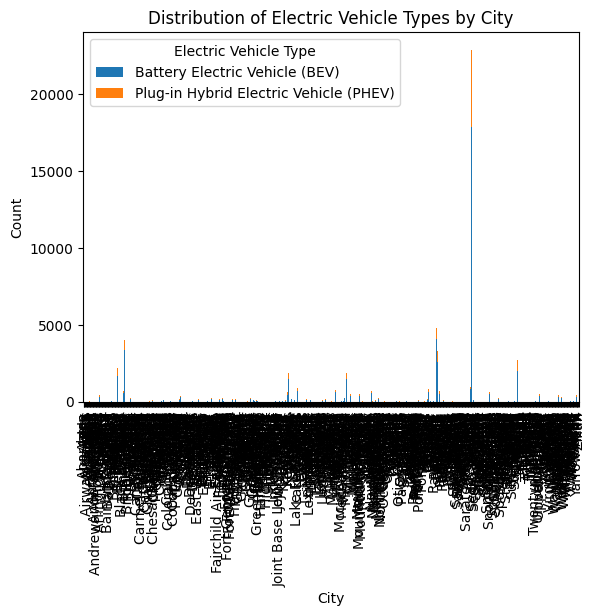

In [13]:
# Draw plots to show the distribution between city and electric vehicle type
city_ev_type_counts = df.groupby(['City', 'Electric Vehicle Type']).size().unstack().fillna(0)
city_ev_type_counts.plot(kind='bar', stacked=True, xlabel='City', ylabel='Count', title='Distribution of Electric Vehicle Types by City')
plt.show()

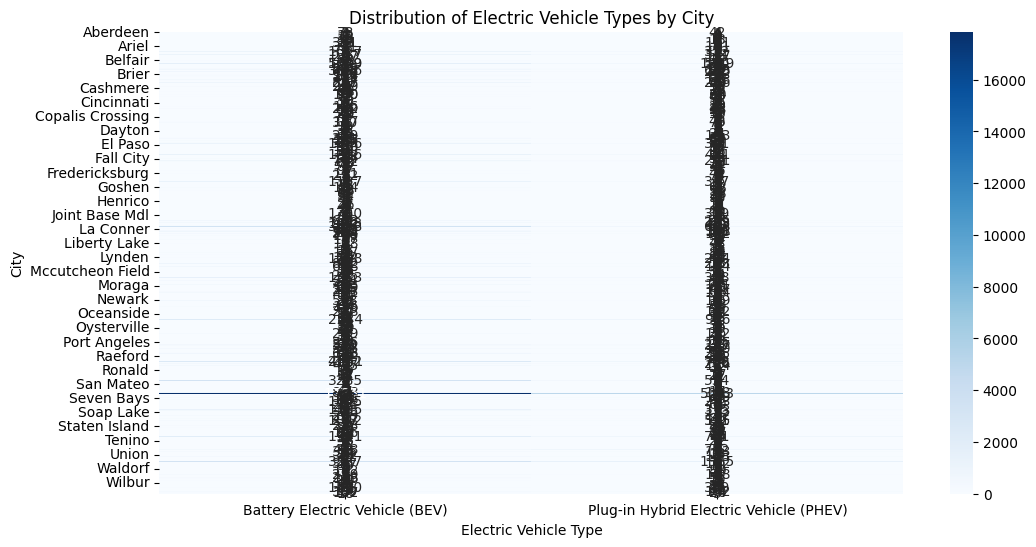

In [14]:
import seaborn as sns

# Create a pivot table to count the occurrences of each electric vehicle type by city
city_ev_type_counts = df.pivot_table(index='City', columns='Electric Vehicle Type', aggfunc='size', fill_value=0)

# Plot the distribution of electric vehicle types by city
plt.figure(figsize=(12, 6))
sns.heatmap(city_ev_type_counts, cmap='Blues', annot=True, fmt='d')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('City')
plt.title('Distribution of Electric Vehicle Types by City')
plt.show()
